<a href="https://colab.research.google.com/github/jacksonguedes/IACD/blob/main/Aula04_Tratamento_de_Dados.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tratamento de Dados  
Base de Dados: Spain Eletricity  
Aluno: Jackson da Silva Guedes  
Disci: Inteligência Artificial e Ciências de Dados Aplicados a Sistemas Elétricos

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as mno

import warnings
warnings.filterwarnings("ignore")

Carregando as basses de dados

In [3]:
df_energy = pd.read_csv("energy_dataset.csv", header = 0, parse_dates = ["time"])
df_weather = pd.read_csv("weather_features.csv", header = 0, parse_dates = ["dt_iso"])

Plotar a primeira e última linha das duas bases de dados

In [6]:
df_energy.iloc[[0, -1]]

,time,generation biomass,generation fossil brown coal/lignite,generation fossil coal-derived gas,generation fossil gas,generation fossil hard coal,generation fossil oil,generation fossil oil shale,generation fossil peat,generation geothermal,...,generation waste,generation wind offshore,generation wind onshore,forecast solar day ahead,forecast wind offshore eday ahead,forecast wind onshore day ahead,total load forecast,total load actual,price day ahead,price actual
0,2015-01-01 00:00:00+01:00,447.0,329.0,0.0,4844.0,4821.0,162.0,0.0,0.0,0.0,...,196.0,0.0,6378.0,17.0,NaN,6436.0,26118.0,25385.0,50.10,65.41
35063,2018-12-31 23:00:00+01:00,290.0,0.0,0.0,6926.0,2166.0,163.0,0.0,0.0,0.0,...,287.0,0.0,3651.0,26.0,NaN,3117.0,24424.0,24455.0,64.27,69.88


In [7]:
df_weather.iloc[[0, -1]]

,dt_iso,city_name,temp,temp_min,temp_max,pressure,humidity,wind_speed,wind_deg,rain_1h,rain_3h,snow_3h,clouds_all,weather_id,weather_main,weather_description,weather_icon
0,2015-01-01 00:00:00+01:00,Valencia,270.475,270.475,270.475,1001,77,1,62,0.0,0.0,0.0,0,800,clear,sky is clear,01n
178395,2018-12-31 23:00:00+01:00,Seville,283.970,282.150,285.150,1029,70,3,50,0.0,0.0,0.0,0,800,clear,sky is clear,01n


Criando uma cópia para não modifica o DataFrame

In [8]:
df_energy_cleaned = df_energy.copy()
df_weather_cleaned = df_weather.copy()

In [9]:
# Ajustando o tipo da coluna do tempo

df_energy_cleaned["time"] = pd.to_datetime(df_energy_cleaned["time"], utc = True, infer_datetime_format = True)

In [11]:
# Verificando se há registros duplicados para o mesmo registro de tempo

print("count of duplicates:",df_energy_cleaned.duplicated(subset=["time"], keep="first").sum())

count of duplicates: 0


In [ ]:
df_energy_cleaned.set_index("time", inplace=True)

In [19]:
# Verificando se existem valores categoricos no DataFrame

print("non-numeric columns:",list(df_energy_cleaned.dtypes[df_energy_cleaned.dtypes == "object"].index))

non-numeric columns: []


In [20]:
# Função para verificar se há valores faltantes no DataFrame
def verifica_dado_faltante(df):
    if df.isnull().values.any(): # Verifica se há pelo menos um valor faltante
        print("Valores faltantes: \n")
        mno.matrix(df)
    else:
        print("Nã há valores faltante\n")

Valores faltantes: 



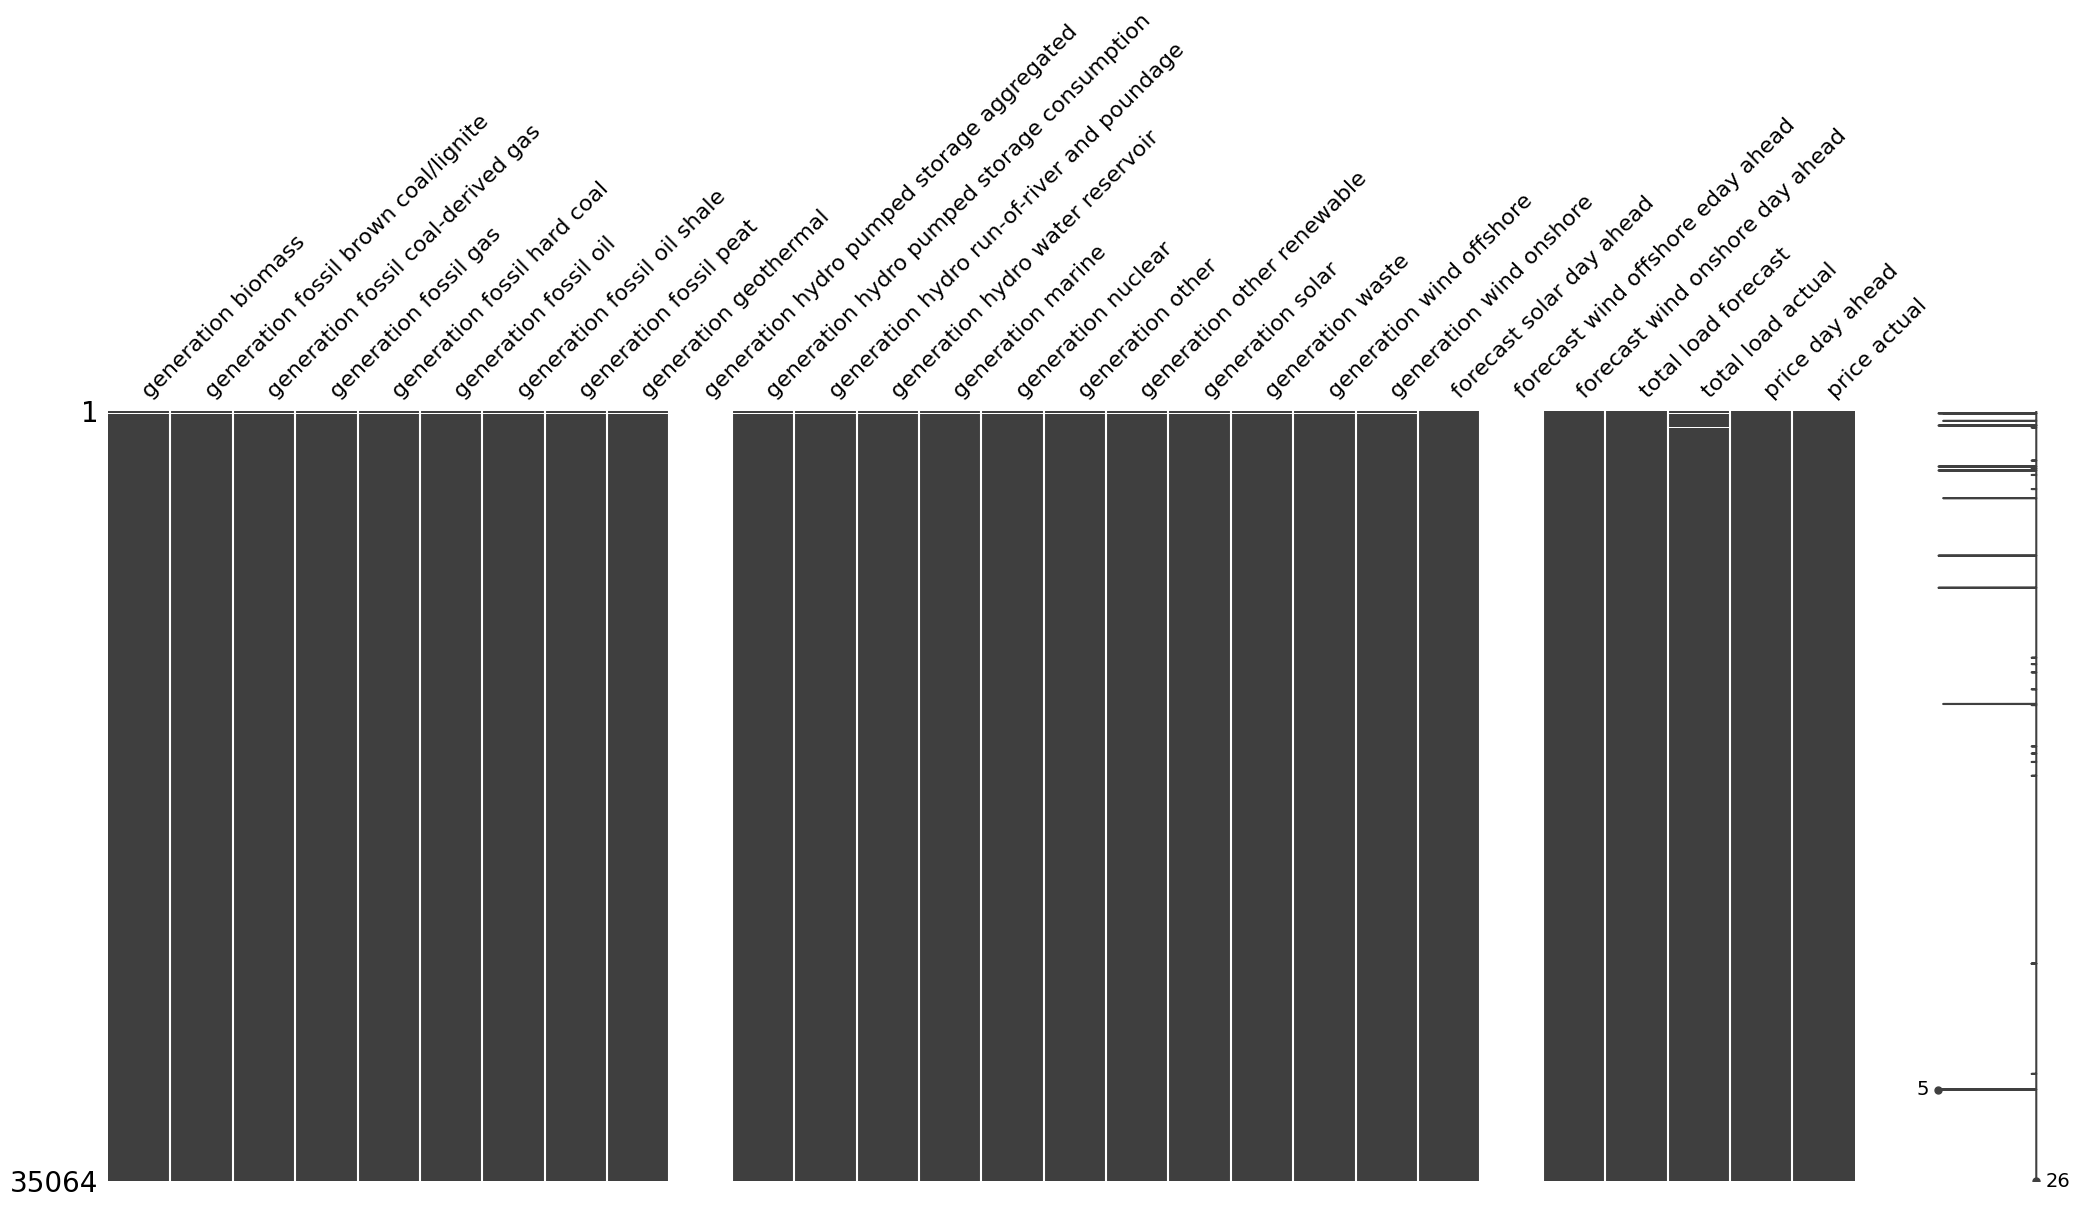

In [21]:
# Coluna brancas não serve, pois não tem dados
verifica_dado_faltante(df_energy_cleaned)

In [22]:
# Verificação de valores NaN
df_energy_cleaned.isna().sum() # Registro das colunas com mais valores faltantes

generation biomass                                19
generation fossil brown coal/lignite              18
generation fossil coal-derived gas                18
generation fossil gas                             18
generation fossil hard coal                       18
generation fossil oil                             19
generation fossil oil shale                       18
generation fossil peat                            18
generation geothermal                             18
generation hydro pumped storage aggregated     35064
generation hydro pumped storage consumption       19
generation hydro run-of-river and poundage        19
generation hydro water reservoir                  18
generation marine                                 19
generation nuclear                                17
generation other                                  18
generation other renewable                        18
generation solar                                  18
generation waste                              

In [23]:
# Verificação de valores nulos
(df_energy_cleaned == 0).sum() # Verifica quantas colunas possuem valores zero

generation biomass                                 4
generation fossil brown coal/lignite           10517
generation fossil coal-derived gas             35046
generation fossil gas                              1
generation fossil hard coal                        3
generation fossil oil                              3
generation fossil oil shale                    35046
generation fossil peat                         35046
generation geothermal                          35046
generation hydro pumped storage aggregated         0
generation hydro pumped storage consumption    12607
generation hydro run-of-river and poundage         3
generation hydro water reservoir                   3
generation marine                              35045
generation nuclear                                 3
generation other                                   4
generation other renewable                         3
generation solar                                   3
generation waste                              

In [24]:
# Eliminando as colunas que só tenham valores 0 e Nan
~(df_energy_cleaned.isin([0, np.nan])).all()


generation biomass                              True
generation fossil brown coal/lignite            True
generation fossil coal-derived gas             False
generation fossil gas                           True
generation fossil hard coal                     True
generation fossil oil                           True
generation fossil oil shale                    False
generation fossil peat                         False
generation geothermal                          False
generation hydro pumped storage aggregated     False
generation hydro pumped storage consumption     True
generation hydro run-of-river and poundage      True
generation hydro water reservoir                True
generation marine                              False
generation nuclear                              True
generation other                                True
generation other renewable                      True
generation solar                                True
generation waste                              

In [25]:
df_energy_cleaned = df_energy_cleaned.loc[:,~(df_energy_cleaned.isin([0, np.nan])).all()]

In [26]:
# Eliminando as colunas de previsão

df_energy_cleaned = df_energy_cleaned.drop(df_energy_cleaned.filter(regex="forecast").columns, axis=1, errors="idnore")
print(df_energy_cleaned.columns)

Index(['generation biomass', 'generation fossil brown coal/lignite',
       'generation fossil gas', 'generation fossil hard coal',
       'generation fossil oil', 'generation hydro pumped storage consumption',
       'generation hydro run-of-river and poundage',
       'generation hydro water reservoir', 'generation nuclear',
       'generation other', 'generation other renewable', 'generation solar',
       'generation waste', 'generation wind onshore', 'total load actual',
       'price day ahead', 'price actual'],
      dtype='object')


In [27]:
# Substituição de valores faltantes

df_energy_cleaned = df_energy_cleaned.interpolate(method="bfill") # interpola para os valores faltantes

In [28]:
# Ainda há valores faltante?
verifica_dado_faltante(df_energy_cleaned)

df_energy_cleaned

Nã há valores faltante



,generation biomass,generation fossil brown coal/lignite,generation fossil gas,generation fossil hard coal,generation fossil oil,generation hydro pumped storage consumption,generation hydro run-of-river and poundage,generation hydro water reservoir,generation nuclear,generation other,generation other renewable,generation solar,generation waste,generation wind onshore,total load actual,price day ahead,price actual
time,,,,,,,,,,,,,,,,,
2014-12-31 23:00:00+00:00,447.0,329.0,4844.0,4821.0,162.0,863.0,1051.0,1899.0,7096.0,43.0,73.0,49.0,196.0,6378.0,25385.0,50.10,65.41
2015-01-01 00:00:00+00:00,449.0,328.0,5196.0,4755.0,158.0,920.0,1009.0,1658.0,7096.0,43.0,71.0,50.0,195.0,5890.0,24382.0,48.10,64.92
2015-01-01 01:00:00+00:00,448.0,323.0,4857.0,4581.0,157.0,1164.0,973.0,1371.0,7099.0,43.0,73.0,50.0,196.0,5461.0,22734.0,47.33,64.48
2015-01-01 02:00:00+00:00,438.0,254.0,4314.0,4131.0,160.0,1503.0,949.0,779.0,7098.0,43.0,75.0,50.0,191.0,5238.0,21286.0,42.27,59.32
2015-01-01 03:00:00+00:00,428.0,187.0,4130.0,3840.0,156.0,1826.0,953.0,720.0,7097.0,43.0,74.0,42.0,189.0,4935.0,20264.0,38.41,56.04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-12-31 18:00:00+00:00,297.0,0.0,7634.0,2628.0,178.0,1.0,1135.0,4836.0,6073.0,63.0,95.0,85.0,277.0,3113.0,30653.0,68.85,77.02
2018-12-31 19:00:00+00:00,296.0,0.0,7241.0,2566.0,174.0,1.0,1172.0,3931.0,6074.0,62.0,95.0,33.0,280.0,3288.0,29735.0,68.40,76.16
2018-12-31 20:00:00+00:00,292.0,0.0,7025.0,2422.0,168.0,50.0,1148.0,2831.0,6076.0,61.0,94.0,31.0,286.0,3503.0,28071.0,66.88,74.30


In [29]:
# renomeando as colunas
colnames_old = df_energy_cleaned.columns
colnames_new = ["gen_bio", "gen_lig","gen_gas", "gen_coal", \
                "gen_oil", "gen_hyd_pump", "gen_hyd_river", "gen_hyd_res",\
                "gen_nuc", " gen_other", "gen_oth_renew", "gen_solar",\
                    "gen_waste", "gen_wind", "load_actual","price_dayahead", \
                        "price"]
dict_cols = dict(zip(colnames_old, colnames_new))
df_energy_cleaned.rename(columns=dict_cols, inplace=True)

print(df_energy_cleaned.info())
df_energy_cleaned.describe()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 35064 entries, 2014-12-31 23:00:00+00:00 to 2018-12-31 22:00:00+00:00
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   gen_bio         35064 non-null  float64
 1   gen_lig         35064 non-null  float64
 2   gen_gas         35064 non-null  float64
 3   gen_coal        35064 non-null  float64
 4   gen_oil         35064 non-null  float64
 5   gen_hyd_pump    35064 non-null  float64
 6   gen_hyd_river   35064 non-null  float64
 7   gen_hyd_res     35064 non-null  float64
 8   gen_nuc         35064 non-null  float64
 9    gen_other      35064 non-null  float64
 10  gen_oth_renew   35064 non-null  float64
 11  gen_solar       35064 non-null  float64
 12  gen_waste       35064 non-null  float64
 13  gen_wind        35064 non-null  float64
 14  load_actual     35064 non-null  float64
 15  price_dayahead  35064 non-null  float64
 16  price           35064 non-nul

,gen_bio,gen_lig,gen_gas,gen_coal,gen_oil,gen_hyd_pump,gen_hyd_river,gen_hyd_res,gen_nuc,gen_other,gen_oth_renew,gen_solar,gen_waste,gen_wind,load_actual,price_dayahead,price
count,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000
mean,383.529888,448.097222,5622.695642,4256.511921,298.343515,475.601415,972.197467,2605.572125,6263.465007,60.226643,85.634326,1432.832136,269.418178,5464.845311,28698.954198,49.874341,57.884023
std,85.346201,354.620143,2201.483995,1962.005905,52.521901,792.344571,400.712038,1835.349203,840.302056,20.238834,14.077016,1679.946586,50.219732,3213.474657,4576.561310,14.618900,14.204083
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18041.000000,2.060000,9.330000
25%,333.000000,0.000000,4126.000000,2527.000000,263.000000,0.000000,637.000000,1078.000000,5759.000000,53.000000,73.000000,71.000000,240.000000,2933.000000,24807.750000,41.490000,49.347500
50%,367.000000,509.000000,4969.000000,4475.000000,300.000000,68.000000,906.000000,2164.000000,6564.000000,57.000000,88.000000,616.000000,279.000000,4849.500000,28904.000000,50.520000,58.020000
75%,433.000000,757.000000,6429.000000,5839.000000,330.000000,616.000000,1250.000000,3758.000000,7025.000000,80.000000,97.000000,2579.000000,310.000000,7401.000000,32195.000000,60.530000,68.010000
max,592.000000,999.000000,20034.000000,8359.000000,449.000000,4523.000000,2000.000000,9728.000000,7117.000000,106.000000,119.000000,5792.000000,357.000000,17436.000000,41015.000000,101.990000,116.800000


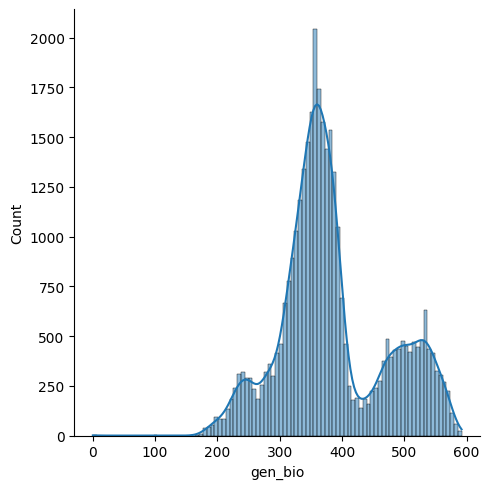

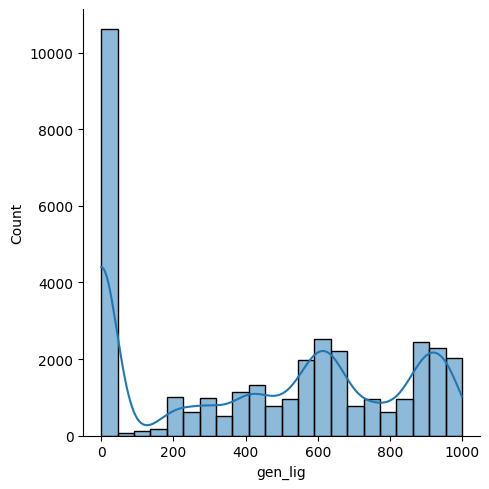

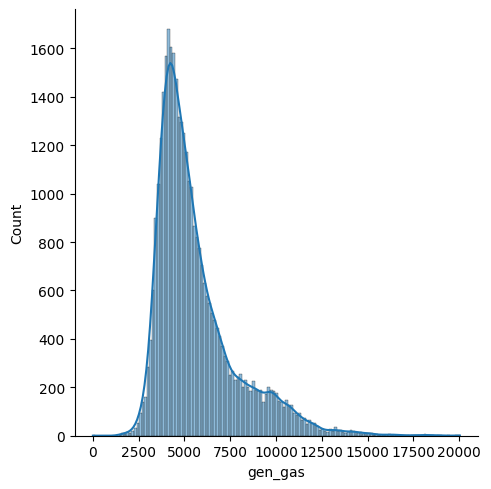

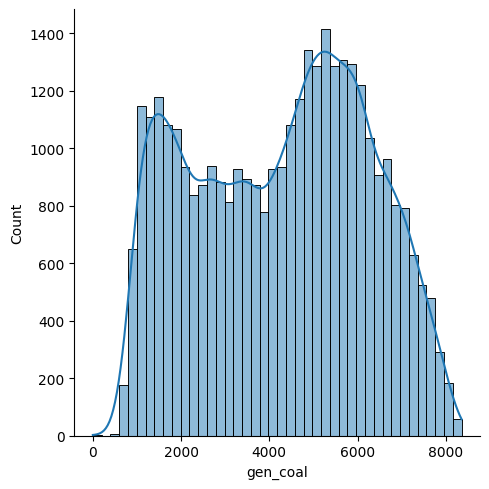

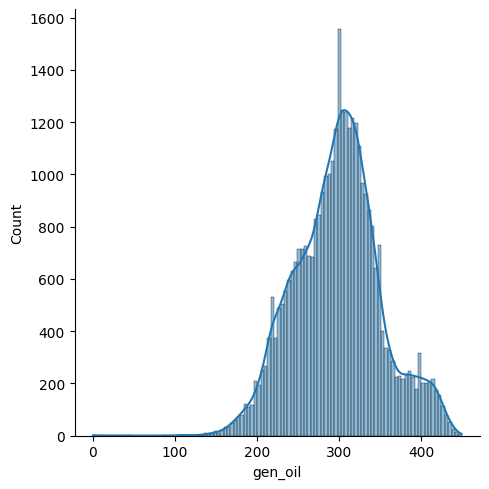

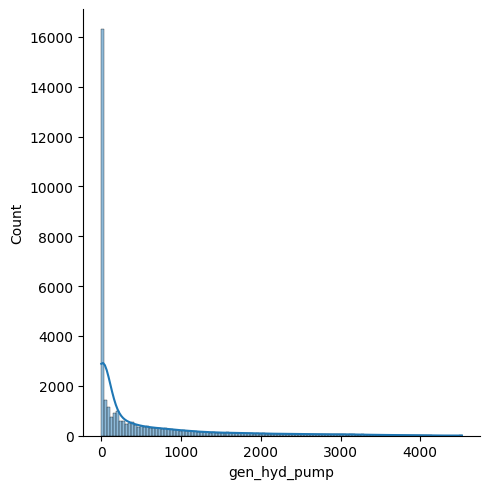

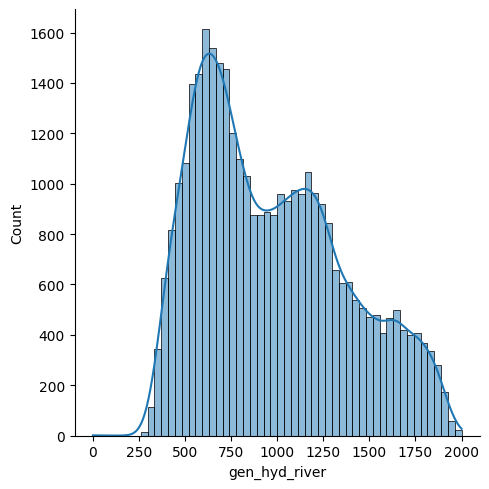

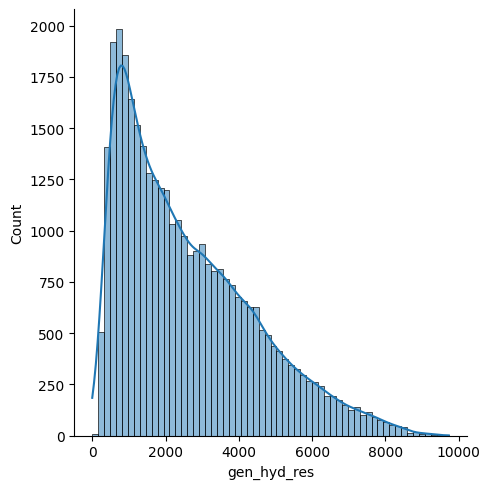

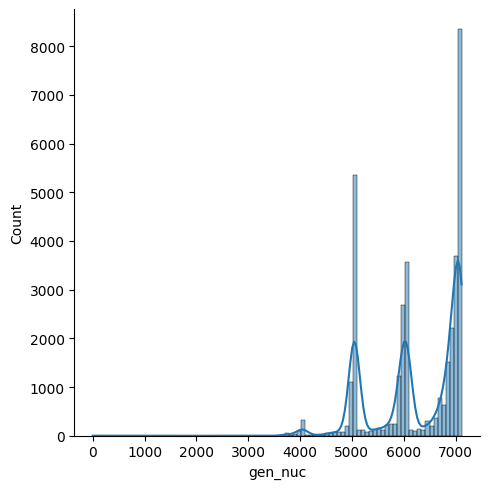

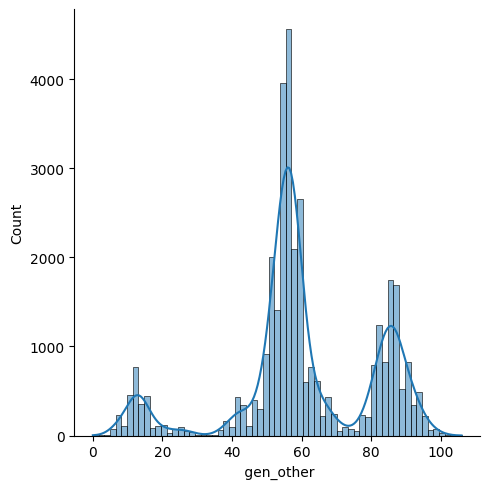

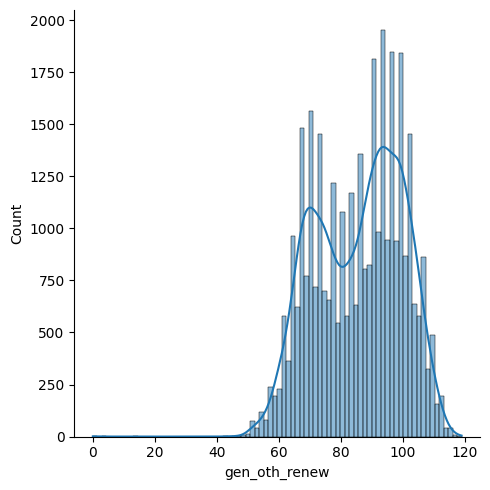

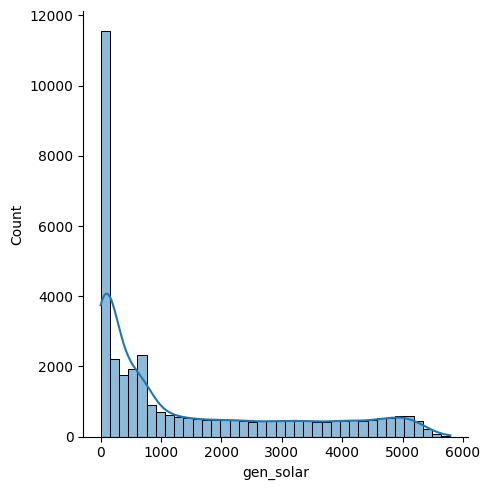

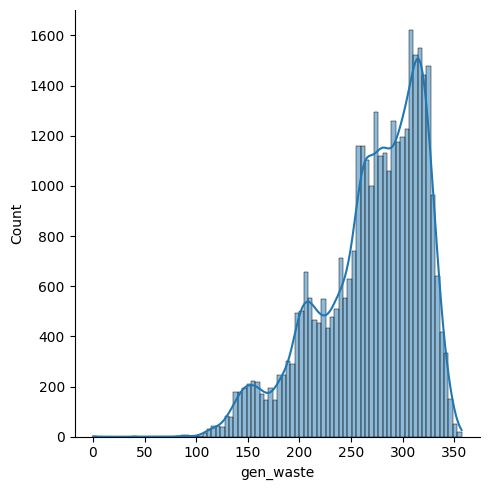

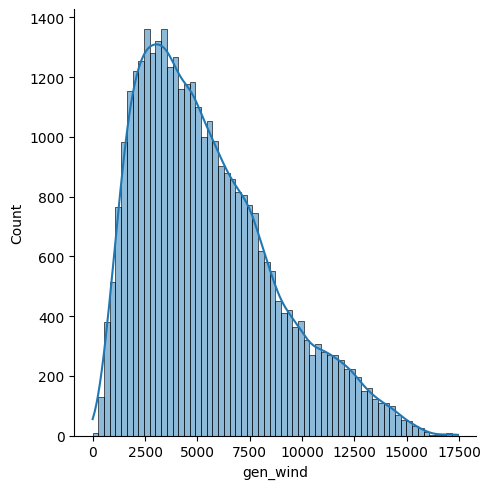

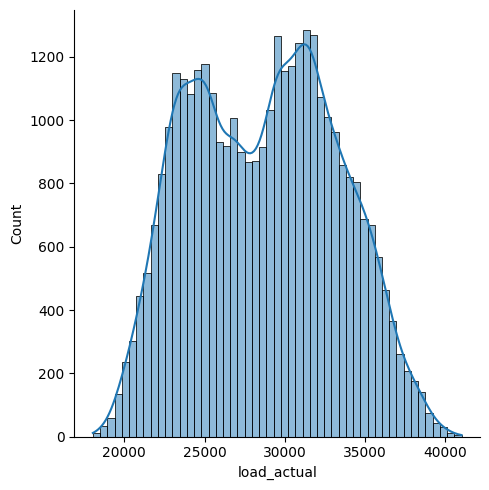

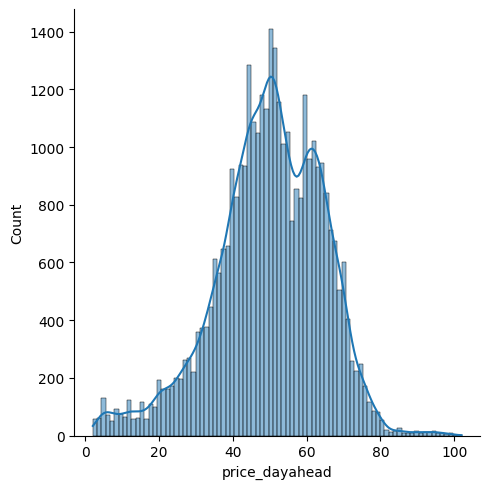

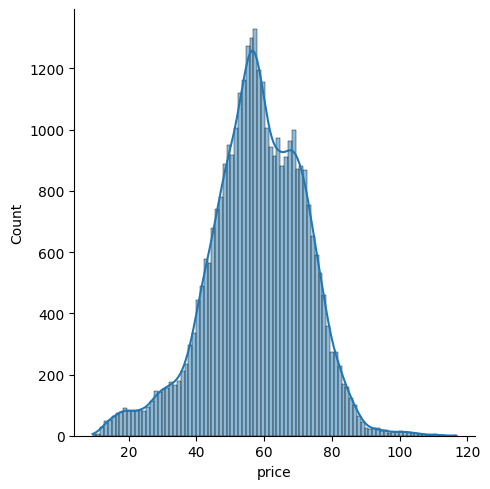

In [30]:
# Distribuição
for i, c in enumerate(df_energy_cleaned.columns):
    sns.displot(x=df_energy_cleaned[c],palette="coolwarm",kde=True)
    plt.show()

In [31]:
# Identificação de sazonalidades nos valores dos preços de energia do ultimo ano

df_sazonality = df_energy_cleaned.loc[df_energy_cleaned.index >= "2018-01-01 00:00:00+00:00",["price"]]
df_sazonality["month"] = df_sazonality.index.month
df_sazonality["wday"] = df_sazonality.index.dayofweek
dict_days = {0:"1_Mon", 1:"2_Tue", 2:"3_wed", 3:"4_Thu", 4:"5_fri", 5:"6_sat",6:"7_sun"}
df_sazonality["weekday"] = df_sazonality["wday"].apply(lambda x: dict_days[x])
df_sazonality["hour"] = df_sazonality.index.hour
df_sazonality = df_sazonality.astype({"hour":float, "wday":float,"month":float})

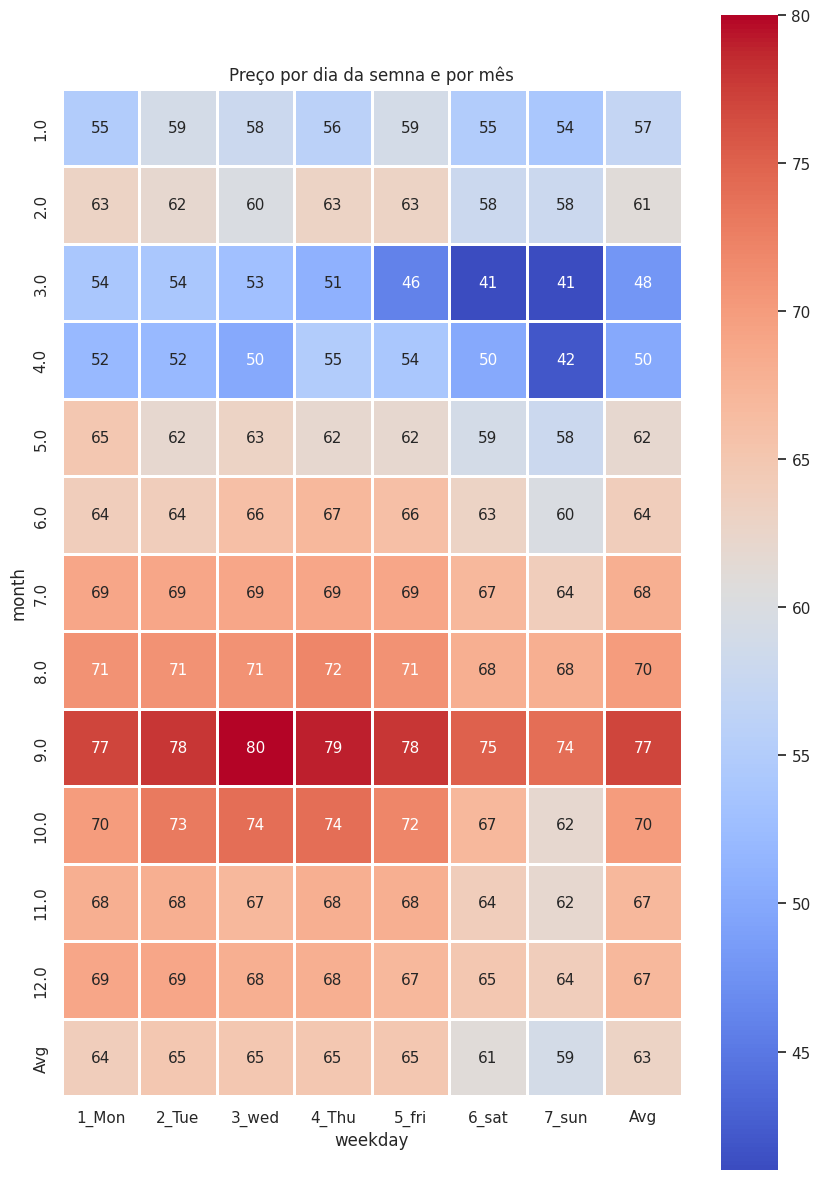

In [32]:
df_sazonality.iloc[[0, -1]]

piv = pd.pivot_table(df_sazonality,
                     values="price",
                     index="month",
                     columns="weekday",
                     aggfunc="mean",
                     margins=True,margins_name= "Avg",
                     fill_value=0)
pd.options.display.float_format = '{:,.0f}'.format
plt.figure(figsize = (10, 15))
sns.set(font_scale=1)
sns.heatmap(piv.round(0),annot=True, square=True, \
            linewidths=.75, cmap="coolwarm",fmt=".0f", annot_kws = {"size": 11})
plt.title("Preço por dia da semana e por mês")
plt.show()

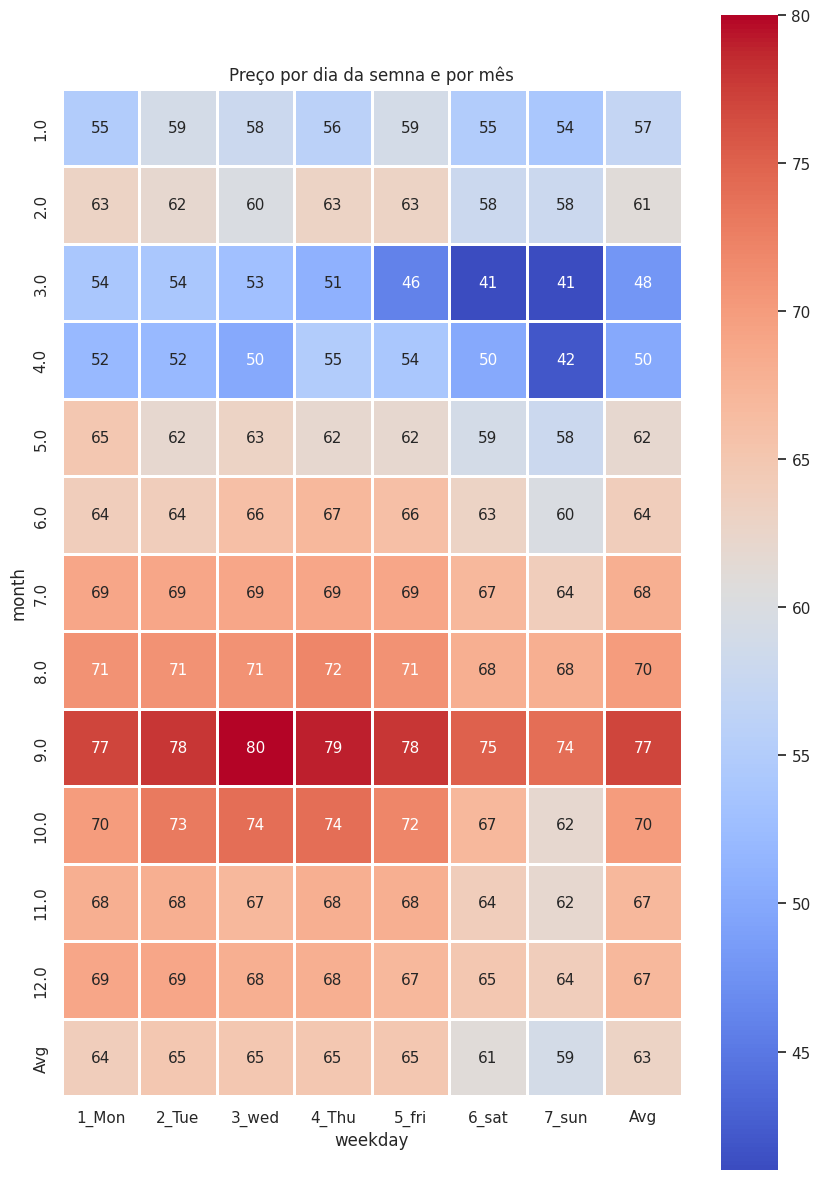

In [33]:
df_sazonality.iloc[[0, -1]]

piv = pd.pivot_table(df_sazonality,
                     values="price",
                     index="month",
                     columns="weekday",
                     aggfunc="mean",
                     margins=True,margins_name= "Avg",
                     fill_value=0)
pd.options.display.float_format = '{:,.0f}'.format
plt.figure(figsize = (10, 15))
sns.set(font_scale=1)
sns.heatmap(piv.round(0),annot=True, square=True, \
            linewidths=.75, cmap="coolwarm",fmt=".0f", annot_kws = {"size": 11})
plt.title("Preço por dia da semna e por mês")
plt.show()